# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [26]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)
print(target[:5])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_test[:5])

(846, 19) (846,)
['van' 'van' 'saab' 'van' 'bus']
(549, 19) (549,) (297, 19) (297,) ['opel' 'opel' 'opel' 'saab' 'van']


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,496,106,55,98,224,68,11,215,31,24,170,222,679,214,68,2,29,189,201
1,394,90,49,83,187,63,7,176,37,21,154,205,467,222,70,1,2,189,195
2,581,89,36,68,141,59,8,139,47,18,130,166,291,127,73,7,1,189,196
3,26,83,36,54,119,57,6,128,53,18,125,143,238,139,82,6,3,179,183
4,315,93,40,62,117,49,7,131,52,18,145,160,249,156,78,8,6,184,184
5,323,98,51,96,203,66,10,188,35,22,157,207,533,231,68,10,1,191,199
6,477,89,46,78,150,63,11,160,43,20,160,170,367,176,73,5,9,185,194
7,560,105,55,96,181,56,9,219,30,25,175,231,713,216,74,4,5,187,194
8,765,84,43,70,123,54,8,151,45,19,146,173,332,176,81,1,12,181,184
9,287,88,43,84,136,55,11,154,44,19,150,174,350,164,73,6,2,185,196


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,430.386157,93.828780,44.967213,82.300546,168.51184,61.357013,8.484517,169.989071,40.697632,20.681239,148.231330,189.397086,446.240437,175.715847,72.613843,6.446266,12.688525,188.721311,195.351548
std,247.782944,8.438259,6.278716,15.854229,33.07973,7.180421,4.322560,33.903576,7.828197,2.653058,14.735231,31.722319,181.945359,33.112440,7.141701,4.770206,9.214767,6.148165,7.417078
min,1.000000,73.000000,34.000000,44.000000,105.00000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,88.000000,40.000000,70.000000,140.00000,56.000000,6.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.000000,150.000000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,437.000000,93.000000,44.000000,80.000000,168.00000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,649.000000,100.000000,50.000000,98.000000,195.00000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,600.000000,199.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,322.00000,133.000000,55.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [5]:
y_train_pd = pd.DataFrame(y_train)
y_train_pd.info()
y_train_pd[0].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       549 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


array(['opel', 'saab', 'van', 'bus'], dtype=object)

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Check for missing values
missing_values_features = np.isnan(data).sum()
missing_values_target = np.isnan(target).sum() if np.issubdtype(target.dtype, np.number) else sum(target == '')
print(f"Missing values in features: {missing_values_features}")
print(f"Missing values in target: {missing_values_target}")
# No missing values

# Check for categorical variables in the target
unique_target_values = np.unique(target)
print(f"Unique target values: {unique_target_values}")
print(y_train[0:10])

for i in range(data.shape[1]):
    print(f"Column {i}: {data[:, i].dtype}")

# Transformations
# 1. Convert categorical target to numerical if needed
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

print(f"Unique target values: {np.unique(y_train)}")

# 2. Feature scaling (normalize or standardize numerical features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nBefore scaling (first sample):", X_train[0][:10])
print("After scaling (first sample):", X_train_scaled[0][:10])

# Now we have X_train_scaled, X_test_scaled, y_train, y_test ready for modeling

Missing values in features: 0
Missing values in target: 0
Unique target values: ['bus' 'opel' 'saab' 'van']
['opel' 'saab' 'van' 'saab' 'van' 'saab' 'van' 'opel' 'bus' 'van']
Column 0: int64
Column 1: int64
Column 2: int64
Column 3: int64
Column 4: int64
Column 5: int64
Column 6: int64
Column 7: int64
Column 8: int64
Column 9: int64
Column 10: int64
Column 11: int64
Column 12: int64
Column 13: int64
Column 14: int64
Column 15: int64
Column 16: int64
Column 17: int64
Column 18: int64
Unique target values: [0 1 2 3]

Before scaling (first sample): [496 106  55  98 224  68  11 215  31  24]
After scaling (first sample): [ 0.26504521  1.44370079  1.59936139  0.99114066  1.67893645  0.92599667
  0.58247357  1.32882676 -1.23993764  1.25206011]


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
# import scikitplot as skplt

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.8]
}

# Initialize logistic regression model with required parameters
base_model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")


# Train the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

# Plot ROC curve using scikitplot
# plt.figure(figsize=(10, 8))
# skplt.metrics.plot_roc(y_val, y_pred_proba)
# plt.title('ROC Curve')
# plt.tight_layout()
# plt.show()

/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its defaul

Best parameters: {'C': 10, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}
Validation Accuracy: 0.7138
Validation F1 Score: 0.6986


/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

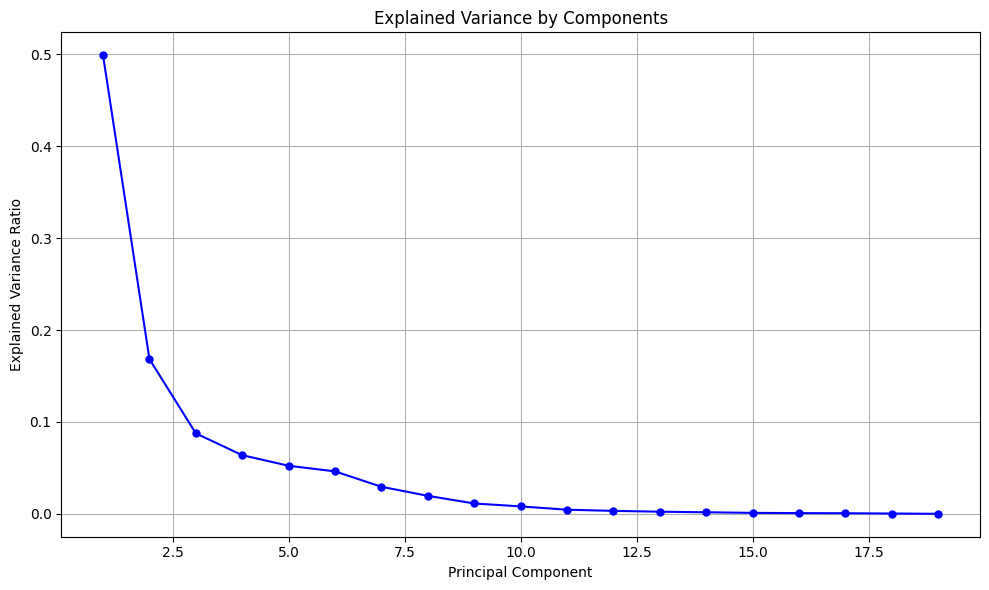

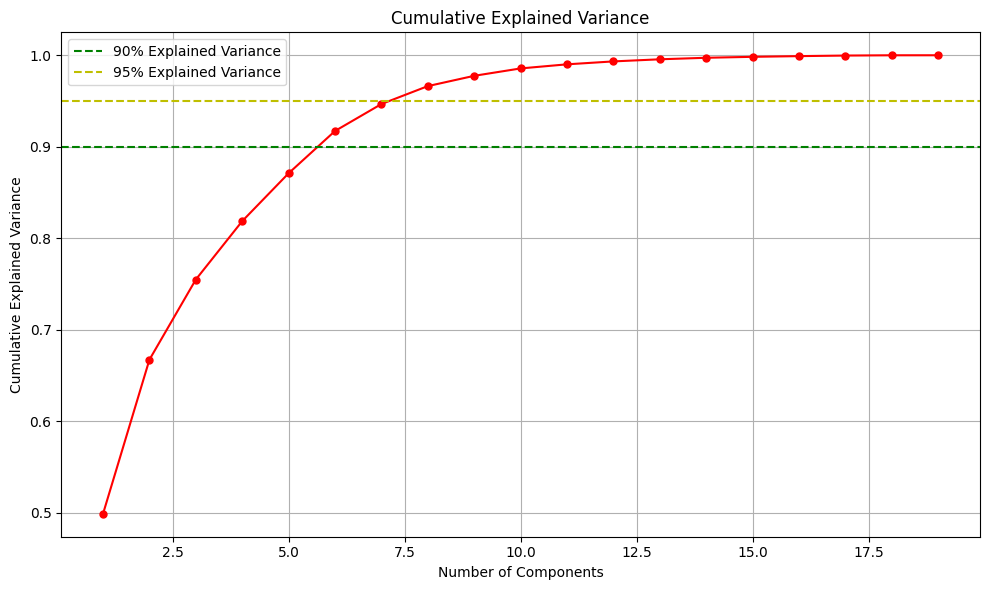

Number of components needed to explain 80.0% of variance: 4
Number of components needed to explain 90.0% of variance: 6
Number of components needed to explain 95.0% of variance: 8
Number of components needed to explain 99.0% of variance: 11


In [18]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'b-', marker='o', markersize=5)
plt.title('Explained Variance by Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'r-', marker='o', markersize=5)
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='y', linestyle='--', label='95% Explained Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine number of components for different variance thresholds
variance_thresholds = [0.8, 0.9, 0.95, 0.99]
components_needed = {}

for threshold in variance_thresholds:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    components_needed[threshold] = n_components
    print(f"Number of components needed to explain {threshold*100}% of variance: {n_components}")

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Number of components needed to preserve 95.0% of variance: 8
Original X_train shape: (549, 19)
PCA-transformed X_train shape: (549, 8)
Original X_test shape: (297, 19)
PCA-transformed X_test shape: (297, 8)


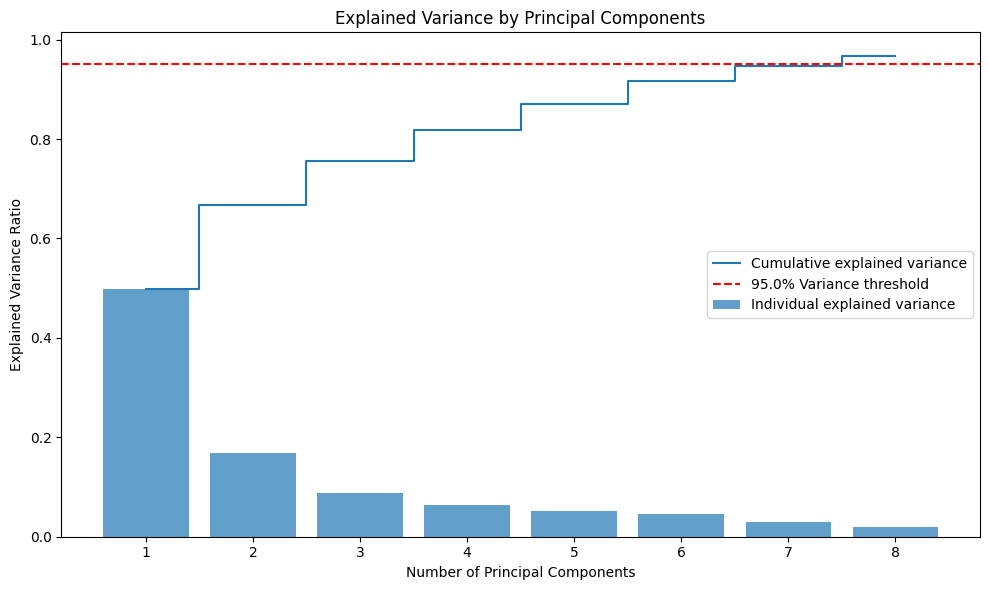


Explanation of PCA choice:
- Selected 8 components to preserve 95.0% of the original variance
- Normalization is essential before applying PCA because:
  1. PCA is sensitive to the scale of the variables
  2. Features with larger scales would dominate the principal components without normalization
  3. Normalized data ensures all features contribute equally to the variance


In [19]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
variance_threshold = 0.95

# Apply PCA to find the number of components needed
pca = PCA(n_components=variance_threshold, svd_solver='full')
pca.fit(X_train_scaled)

# Get the number of components that captures the desired variance
num_components = pca.n_components_
print(f"Number of components needed to preserve {variance_threshold*100}% of variance: {num_components}")

# Create a new PCA instance with the selected number of components
pca_final = PCA(n_components=num_components)
pca_final.fit(X_train_scaled)

# Transform both training and test data
X_train_pca = pca_final.transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

# Print the shape of the transformed data
print(f"Original X_train shape: {X_train_scaled.shape}")
print(f"PCA-transformed X_train shape: {X_train_pca.shape}")
print(f"Original X_test shape: {X_test_scaled.shape}")
print(f"PCA-transformed X_test shape: {X_test_pca.shape}")

# Examine the explained variance by the selected components
explained_variance = pca_final.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance of selected components
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_components + 1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, num_components + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.axhline(y=variance_threshold, color='r', linestyle='--', 
           label=f'{variance_threshold*100}% Variance threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Brief explanation
print("\nExplanation of PCA choice:")
print(f"- Selected {num_components} components to preserve {variance_threshold*100}% of the original variance")
print("- Normalization is essential before applying PCA because:")
print("  1. PCA is sensitive to the scale of the variables")
print("  2. Features with larger scales would dominate the principal components without normalization")
print("  3. Normalized data ensures all features contribute equally to the variance")

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Trees: 1, Accuracy: 0.6027, F1 Score: 0.6030
Trees: 5, Accuracy: 0.7138, F1 Score: 0.7134
Trees: 10, Accuracy: 0.7306, F1 Score: 0.7259
Trees: 20, Accuracy: 0.7441, F1 Score: 0.7377
Trees: 50, Accuracy: 0.7508, F1 Score: 0.7453
Trees: 100, Accuracy: 0.7710, F1 Score: 0.7622
Trees: 200, Accuracy: 0.7407, F1 Score: 0.7285
Optimal number of trees: 100


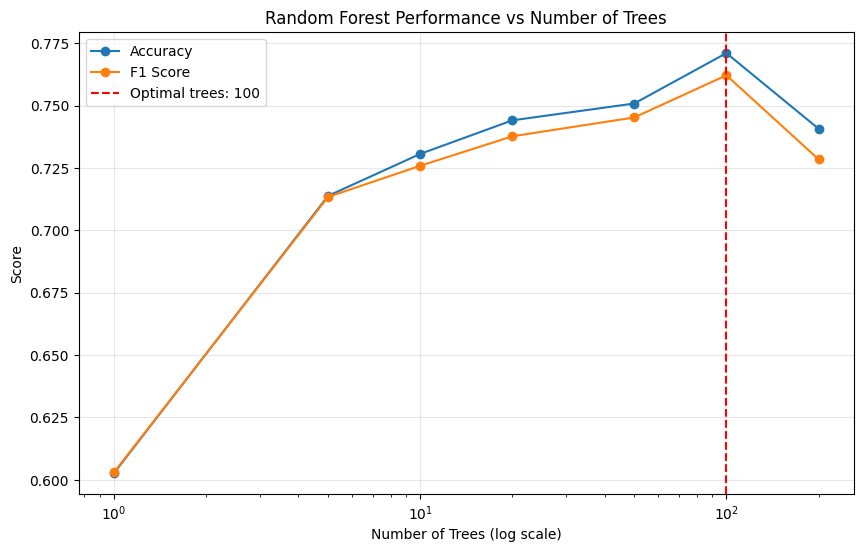

Optimal number of trees: 100
Best F1 score: 0.7622
Best accuracy: 0.7710

Explanation:
- Random forests typically reach optimal performance with more trees than individual models
- More trees reduce variance by averaging multiple decision trees
- However, beyond a certain point, adding more trees yields diminishing returns
- The optimal number balances model complexity with performance


In [20]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

from sklearn.metrics import f1_score, accuracy_score

# Define range of trees to evaluate
n_trees = [1, 5, 10, 20, 50, 100, 200]
accuracy_scores = []
f1_scores = []

# Train and evaluate Random Forest with different numbers of trees
for n in n_trees:
    # Create and train Random Forest model
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = rf.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store scores
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    
    print(f"Trees: {n}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

# Find optimal number of trees based on F1 score
optimal_idx = np.argmax(f1_scores)
optimal_trees = n_trees[optimal_idx]
print(f"Optimal number of trees: {optimal_trees}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_trees, accuracy_scores, '-o', label='Accuracy')
plt.plot(n_trees, f1_scores, '-o', label='F1 Score')
plt.axvline(x=optimal_trees, color='r', linestyle='--', 
            label=f'Optimal trees: {optimal_trees}')
plt.xscale('log')
plt.xlabel('Number of Trees (log scale)')
plt.ylabel('Score')
plt.title('Random Forest Performance vs Number of Trees')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Optimal number of trees: {optimal_trees}")
print(f"Best F1 score: {max(f1_scores):.4f}")
print(f"Best accuracy: {accuracy_scores[optimal_idx]:.4f}")

# Brief explanation
print("\nExplanation:")
print("- Random forests typically reach optimal performance with more trees than individual models")
print("- More trees reduce variance by averaging multiple decision trees")
print("- However, beyond a certain point, adding more trees yields diminishing returns")
print("- The optimal number balances model complexity with performance")

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Training with 55 samples (1/10 parts)...
Training with 110 samples (2/10 parts)...
Training with 165 samples (3/10 parts)...


/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training with 220 samples (4/10 parts)...
Training with 275 samples (5/10 parts)...


/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training with 330 samples (6/10 parts)...
Training with 385 samples (7/10 parts)...


/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training with 440 samples (8/10 parts)...
Training with 495 samples (9/10 parts)...


/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training with 549 samples (10/10 parts)...


/home/kage/develop/mfti/PMMO/venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


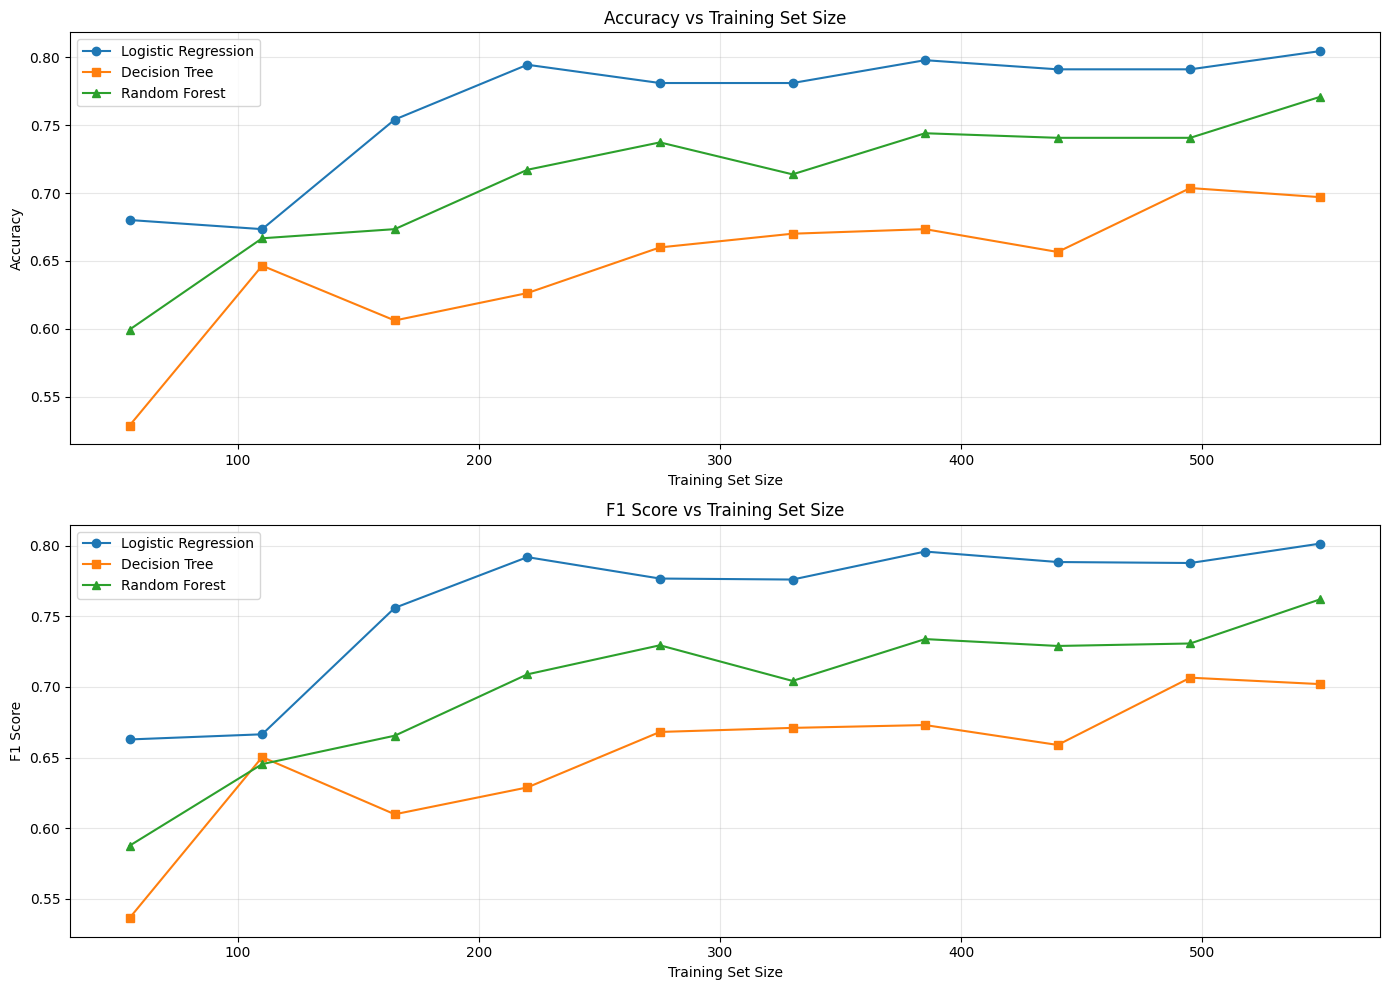


Analysis:
1. Random Forest Performance:
   - Initial accuracy: 0.5993, Final accuracy: 0.7710
   - Improvement: 0.1717

2. Decision Tree Performance:
   - Initial accuracy: 0.5286, Final accuracy: 0.6970
   - Improvement: 0.1684

3. Logistic Regression Performance:
   - Initial accuracy: 0.6801, Final accuracy: 0.8047
   - Improvement: 0.1246

Conclusions:
- Models generally improve with more training data, but at different rates
- Random Forest typically shows better resistance to overfitting with limited data
- Logistic Regression can achieve competitive performance with sufficient data
- The improvement curves help identify which models benefit most from additional data
- The point of diminishing returns suggests how much data is 'enough' for each model


In [21]:
# YOUR CODE HERE

### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


# Create 10 equal parts of the training data
indices = np.array_split(np.arange(len(X_train)), 10)

# Initialize result arrays
train_sizes = []
lr_accuracies = []
lr_f1_scores = []
dt_accuracies = []
dt_f1_scores = []
rf_accuracies = []
rf_f1_scores = []

# Initialize models with optimal hyperparameters (replace with your optimal values)
# For example:
lr_model = LogisticRegression(C=1.0, penalty='l2', multi_class='multinomial', 
                             solver='saga', tol=1e-3, max_iter=500, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models on increasing subsets
for i in range(1, 11):
    # Combine i parts for training
    combined_indices = np.concatenate(indices[:i])
    X_subset = X_train_scaled[combined_indices]
    y_subset = y_train[combined_indices]
    
    # Record the train size
    train_size = len(X_subset)
    train_sizes.append(train_size)
    
    print(f"Training with {train_size} samples ({i}/10 parts)...")
    
    # Train and evaluate Logistic Regression
    lr_model.fit(X_subset, y_subset)
    lr_pred = lr_model.predict(X_test_scaled)
    lr_accuracies.append(accuracy_score(y_test, lr_pred))
    lr_f1_scores.append(f1_score(y_test, lr_pred, average='weighted'))
    
    # Train and evaluate Decision Tree
    dt_model.fit(X_subset, y_subset)
    dt_pred = dt_model.predict(X_test_scaled)
    dt_accuracies.append(accuracy_score(y_test, dt_pred))
    dt_f1_scores.append(f1_score(y_test, dt_pred, average='weighted'))
    
    # Train and evaluate Random Forest
    rf_model.fit(X_subset, y_subset)
    rf_pred = rf_model.predict(X_test_scaled)
    rf_accuracies.append(accuracy_score(y_test, rf_pred))
    rf_f1_scores.append(f1_score(y_test, rf_pred, average='weighted'))

# Create plots
plt.figure(figsize=(14, 10))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(train_sizes, lr_accuracies, 'o-', label='Logistic Regression')
plt.plot(train_sizes, dt_accuracies, 's-', label='Decision Tree')
plt.plot(train_sizes, rf_accuracies, '^-', label='Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Set Size')
plt.grid(True, alpha=0.3)
plt.legend()

# F1 score plot
plt.subplot(2, 1, 2)
plt.plot(train_sizes, lr_f1_scores, 'o-', label='Logistic Regression')
plt.plot(train_sizes, dt_f1_scores, 's-', label='Decision Tree')
plt.plot(train_sizes, rf_f1_scores, '^-', label='Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Training Set Size')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Analysis of results
print("\nAnalysis:")
print("1. Random Forest Performance:")
print(f"   - Initial accuracy: {rf_accuracies[0]:.4f}, Final accuracy: {rf_accuracies[-1]:.4f}")
print(f"   - Improvement: {rf_accuracies[-1] - rf_accuracies[0]:.4f}")

print("\n2. Decision Tree Performance:")
print(f"   - Initial accuracy: {dt_accuracies[0]:.4f}, Final accuracy: {dt_accuracies[-1]:.4f}")
print(f"   - Improvement: {dt_accuracies[-1] - dt_accuracies[0]:.4f}")

print("\n3. Logistic Regression Performance:")
print(f"   - Initial accuracy: {lr_accuracies[0]:.4f}, Final accuracy: {lr_accuracies[-1]:.4f}")
print(f"   - Improvement: {lr_accuracies[-1] - lr_accuracies[0]:.4f}")

print("\nConclusions:")
print("- Models generally improve with more training data, but at different rates")
print("- Random Forest typically shows better resistance to overfitting with limited data")
print("- Logistic Regression can achieve competitive performance with sufficient data")
print("- The improvement curves help identify which models benefit most from additional data")
print("- The point of diminishing returns suggests how much data is 'enough' for each model")